# Homework 2 - Machine Learning and Computational Statistics
### Ilias Katsampalos

### Ex1
For the following nonlinear model $y = 3x_1^2 + 4x_2^2 + 5x_3^2 + 7x_1x_2 + x_1x_3 + 4x_2x_3 - 2x_1 - 3x_2 - 5x_3 + \textit{η}$ we have:  
$X = [x_1, x_2, x_3], X \epsilon R^3 \rightarrow y \epsilon R$  
Condidering the set of transformation functions 
$φ(x) = 
\left[\begin{array}{cc}
φ_1(x)\\
φ_2(x)\\
φ_3(x)\\
φ_4(x)\\
φ_5(x)\\
φ_6(x)\\
φ_7(x)\\
φ_8(x)\\
φ_9(x)\\
\end{array}\right] = 
\left[\begin{array}{cc}
x_1^2\\
x_2^2\\
x_3^2\\
x_1x_2\\
x_1x_3\\
x_2x_3\\
x_1\\
x_2\\
x_3
\end{array}\right]
$ the initial non linear model can be written as:
  
$y = 3φ_1(x) + 4φ_2(x) + 5φ_3(x) + 7φ_4(x) + φ_5(x) + 4φ_6(x) - 2φ_7(x) - 3φ_8(x) - 5φ_9(x) + η$ and the dimension of the transformed space is $R^9$

### Ex2
For the following nonlinear model $y = x_1^2 + 3x_2^2 + 6x_3^2 + x_1x_2 + x_2x_3 >(<) 3 \rightarrow \boldsymbol{x}  \epsilon ω_1(ω_2)$ the original space is   
$X = [x_1, x_2, x_3], X \epsilon R^3 $

Condidering the set of transformation functions 
$φ(x) = 
\left[\begin{array}{cc}
φ_1(x)\\
φ_2(x)\\
φ_3(x)\\
φ_4(x)\\
φ_5(x)\\
\end{array}\right] = 
\left[\begin{array}{cc}
x_1^2\\
x_2^2\\
x_3^2\\
x_1x_2\\
x_2x_3\\
\end{array}\right]
$ the initial non linear model can be written as:
  
$y = φ_1(x) + 3φ_2(x) + 6φ_3(x) + φ_4(x) + φ_5(x) >(<) 3 \rightarrow \boldsymbol{x} \epsilon ω_1(ω_2)$ and the dimension of the transformed space is $R^5$

### Ex3

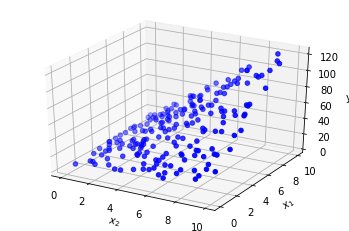

In [1]:
#3a)
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#setting a seed and generate the data
np.random.seed(123)
n = 200

X = np.random.uniform(low = [0,0], high = [10,10], size = (n,2))

#function that returns our generated dataset
def f(X, theta, noise):
    return theta[0] + theta[1] * X[:,0] + theta[2] * X[:,1] + theta[3] * X[:,0] * X[:,1] + noise
    
theta = [3,2,1,1]
noise = np.random.normal(0,np.sqrt(0.05),n)
y = f(X, theta, noise)

#plot X data
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X[:,0],X[:,1],y,c='b',marker='o')
ax.set_xlabel('$x_2$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('y')
plt.show()

3b) θ0=-23.713332429456365, θ1=7.04965510597603, θ2=6.096060269505778


(200, 3)

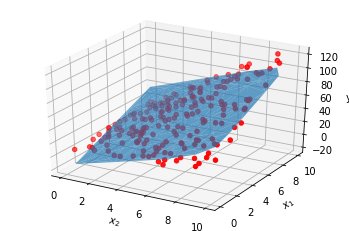

In [5]:
#3b)
#add the intercept b and calculate the thetas using the least squared
X_modelb = np.column_stack([np.ones(n), X])
thetas_modelb = np.linalg.inv(X_modelb.T @ X_modelb) @ X_modelb.T @ y

#plot the regression plane
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X[:,0],X[:,1],y,c='r',marker='o')
ax.set_xlabel('$x_2$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('y')

print('3b) θ0={}, θ1={}, θ2={}'.format(thetas_modelb[0],thetas_modelb[1],thetas_modelb[2]))
surf = ax.plot_trisurf(X_modelb[:,1], X_modelb[:,2], X_modelb@thetas_modelb, alpha = 0.7)

In [30]:
#3c)
y_modelb = X_modelb @ thetas_modelb
mse_b = (y - y_modelb).T @ (y - y_modelb) / n
print('MSE = {}'.format(mse_b))

MSE = 57.68970667699241


In [31]:
#3d) take the dataset format as in part b and add the x1*x2 term
X_modeld = np.column_stack([X_modelb, X[:,0] * X[:,1]])

In [32]:
#3e) calculate the thetas in the R3 subspace
thetas_modeld = np.linalg.inv(X_modeld.T @ X_modeld) @ X_modeld.T @ y

In [33]:
#3f) calculate the MSE of the transformed model
y_modeld = X_modeld @ thetas_modeld
mse_d = (y - y_modeld).T @ (y - y_modeld) / n
print('MSE = {}'.format(mse_d))

MSE = 0.0470564318850676


3g) Obvsiously the transformation $x_1x_2$ has a positive impact on the MSE, which dropped from 57.68 to 0.04. This is because we fitted the model in its original $R^3$ subsbace where the data were generated from, thus getting a linear relationship between dependent and idependent variables. By having a look at the thetas, we can clearly see that they approximate the original values used for generating the data. Small deviations have ocurred, attributed to the term $\textit{η}$, the noise which was generated based on a normal distribution with 0 mean 0.05 variance

In [34]:
print('Thetas modeled in R3: θ0 = {}, θ1 = {}, θ2 = {}, θ3 = {}'.format(thetas_modeld[0],thetas_modeld[1],thetas_modeld[2],thetas_modeld[3]))

Thetas modeled in R3: θ0 = 2.976674736022086, θ1 = 1.9962946822973424, θ2 = 0.9957496817417001, θ3 = 1.0021256698113512


### Ex4

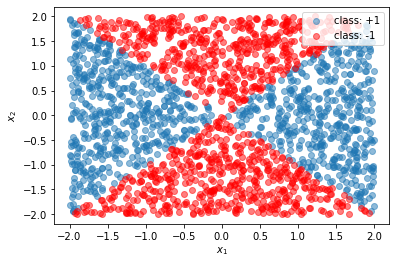

In [53]:
#4a) Generate and plot the data
np.random.seed(123)
n = 2000
X = np.random.uniform(low = [-2,-2], high = [2,2], size = (n,2))
y = np.sign(X[:,0] ** 2 - X[:,1]**2)

plt.scatter(X[np.where(y==1),0], X[np.where(y==1),1], alpha = 0.5, label = 'class: +1')
plt.scatter(X[np.where(y==-1),0], X[np.where(y==-1),1], c='r', alpha = 0.5, label = 'class: -1')
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [54]:
#4b) 
X_transformed = X ** 2

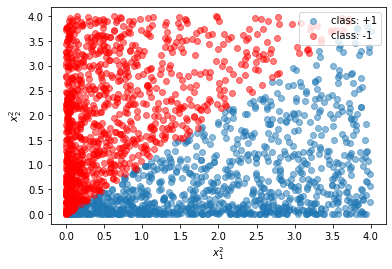

In [55]:
#4c) plot the transformed data
plt.scatter(X_transformed[np.where(y==1),0], X_transformed[np.where(y==1),1], alpha = 0.5, label = 'class: +1')
plt.scatter(X_transformed[np.where(y==-1),0], X_transformed[np.where(y==-1),1], c='r', alpha = 0.5, label = 'class: -1')
plt.legend()
plt.xlabel('$x_1^2$')
plt.ylabel('$x_2^2$')
plt.show()

θ0 = -0.04372108574577577, θ1 = 0.47859900681449796, θ2 = -0.44660677363069146


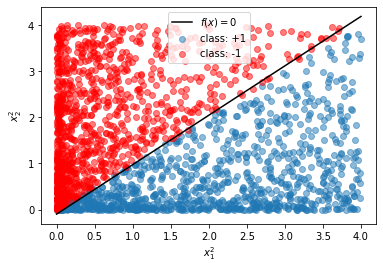

In [56]:
#4d) calculate the thetas of the transformed model and plot the decision boundary
X_transformed = np.column_stack([np.ones(n), X ** 2])
thetas = np.linalg.inv(X_transformed.T @ X_transformed) @ X_transformed.T @ y
print('θ0 = {}, θ1 = {}, θ2 = {}'.format(thetas[0], thetas[1], thetas[2]))

plt.scatter(X_transformed[np.where(y==1),1], X_transformed[np.where(y==1),2], alpha = 0.5, label = 'class: +1')
plt.scatter(X_transformed[np.where(y==-1),1], X_transformed[np.where(y==-1),2], c='r', alpha = 0.5, label = 'class: -1')
plt.xlabel('$x_1^2$')
plt.ylabel('$x_2^2$')

#generate a simple linear space for plotting the line
X_line = np.linspace(0, 4, 50)
#solve for x2
y_line = -(thetas[0] + thetas[1]*X_line)/thetas[2]
plt.plot(X_line, y_line, c = 'black', label = '$f(x)=0$')
plt.legend()
plt.show()

### Ex5

In [8]:
#5a) generate the dataset
np.random.seed(123)
mean_c1 = [0,0]
cov_c1 = np.array([[1,0], [0,1]])

mean_c2 = [15,15]
cov_c2 = np.array([[1,0], [0,1]])

n1 = 1000
n2 = 20

X_c1 = np.random.multivariate_normal(mean_c1, cov_c1, n1)
y_c1 = np.ones(n1)

X_c2 = np.random.multivariate_normal(mean_c2, cov_c2, n2)
y_c2 = -np.ones(n2)

In [9]:
#5b)
# merge the 2 classes in one dataframe and add the intercept term
X_ = np.row_stack([X_c1, X_c2])
y = np.concatenate([y_c1, y_c2])
X = np.column_stack([np.ones(len(X_)), X_])

# solve to find the thetas
thetas = np.linalg.inv(X.T @ X) @ X.T @ y
print('The separating line {} + {}*x1 + {}*x2 = 0'.format(thetas[0], thetas[1], thetas[2]))

The separating line 0.9942654839900769 + -0.05715005273818011*x1 + -0.0622706435968154*x2 = 0


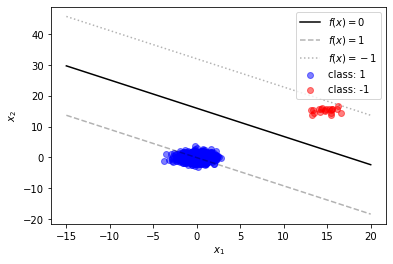

0.007677630826883417


In [10]:
#5c)
X_line = np.linspace(-15,20) #just a linear spice for the line
y0_line = - (thetas[0] + thetas[1]*X_line)/thetas[2] #f(x)=0
y1_line = (1 - thetas[0] - thetas[1]*X_line)/thetas[2] #f(x)=1
ym1_line = (-1 - thetas[0] - thetas[1]*X_line)/thetas[2] #f(x)=-1

#plot the lines
plt.scatter(X_c1[:,0], X_c1[:,1], c = 'b', alpha = 0.5, label = 'class: 1')
plt.scatter(X_c2[:,0], X_c2[:,1], c = 'r', alpha = 0.5, label = 'class: -1')
plt.plot(X_line, y0_line, c='black', label = '$f(x)=0$')
plt.plot(X_line, y1_line, c='black', label = '$f(x)=1$', linestyle='dashed', alpha = 0.3)
plt.plot(X_line, ym1_line, c='black', label = '$f(x)=-1$', linestyle='dotted', alpha = 0.3)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.legend()
plt.show()
#for some intuition I am plotting the lines f(x)=1 and f(x)=-1 as well
mse = ((y - X @ thetas).T @ (y - X @ thetas).T) / len(X)
print(mse)

### 5d)
In the plot above I have plotted the decision boundary line, as well as the lines $f(x) = 1$ and $f(x)=-1$  
Since the classifier is trying to minimize the cost function $J(θ) = ||y - X^Tθ||^2$, in effect it is trying hard to approximate entities of the positive class to the line $f(x) = 1$ and the opposite. The main reason of the inability of the model to classify correctly is the imbalanced dataset, since we have 1000 entities of the postive class and only 20 of the negative class. This, together with the covariance of the positive class (which is greater than the respective of the negative class), pushes the model to "fit" better entities of the positive class, disregarding datapoints of the negative.

### 6 Sum Rule
$P(x) = \sum_{y \epsilon Y}^{}P(x,y) \Rightarrow \frac{n^x}{n} =  \sum_{y \epsilon Y}^{}\frac{n_{i,j}^{x,y}}{n} \Rightarrow$  
$\Rightarrow n^x = \sum_{y \epsilon Y}^{}n_{i,j}^{x,y}$  which is true, since we are summing up all the events where $x$ occured for all the different outcomes of $y$

### Product Rule
$P(x,y) = P(x|y)P(y) = \frac{n_{x,y}}{n_y}\frac{n_y}{n} = \frac{n_{x,y}}{n} = P(x,y)$

### Bays Rule
$P(y|x) = \frac{P(x|y)P(y)}{\sum_{y \epsilon Y}^{}P(x|y)P(y)}$  
using the product rule we have
$P(y|x) = \frac{P(x,y)}{\sum_{y \epsilon Y}^{}P(x,y)}$  
using the summation rule we have
$P(y|x) = \frac{P(x,y)}{P(x)} = \frac{\frac{n_{x,y}}{n}}{\frac{n_x}{n}} = \frac{n_{x,y}}{n_x} = P(y|x)$  